# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | marivan
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | teteven
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | tomok bolon
City not found. Skipping...
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | galliano
Processing Record 20 of Set 1 | bandar lampung
Processing Record 21 of Set 1

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,301.22,76,100,5.74,TK,1695410209
1,olonkinbyen,70.9221,-8.7187,276.00,65,52,3.55,SJ,1695410370
2,kingston,17.9970,-76.7936,305.68,75,40,5.14,JM,1695410178
3,port mathurin,-19.6833,63.4167,296.37,72,0,9.21,MU,1695410212
4,lompoc,34.6391,-120.4579,297.23,68,20,4.12,US,1695410083


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,301.22,76,100,5.74,TK,1695410209
1,olonkinbyen,70.9221,-8.7187,276.00,65,52,3.55,SJ,1695410370
2,kingston,17.9970,-76.7936,305.68,75,40,5.14,JM,1695410178
3,port mathurin,-19.6833,63.4167,296.37,72,0,9.21,MU,1695410212
4,lompoc,34.6391,-120.4579,297.23,68,20,4.12,US,1695410083


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

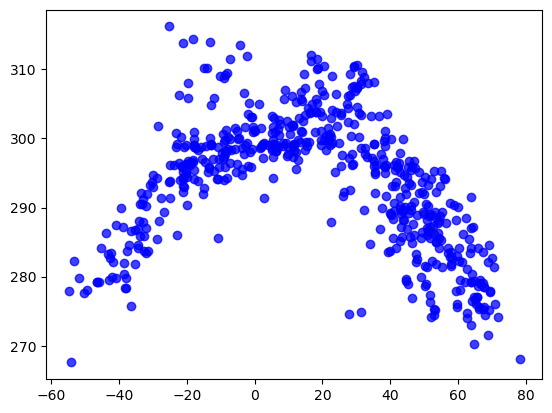

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="blue",
        alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

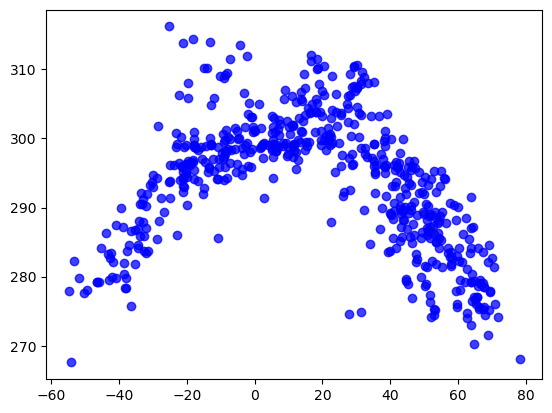

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="blue",
         alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

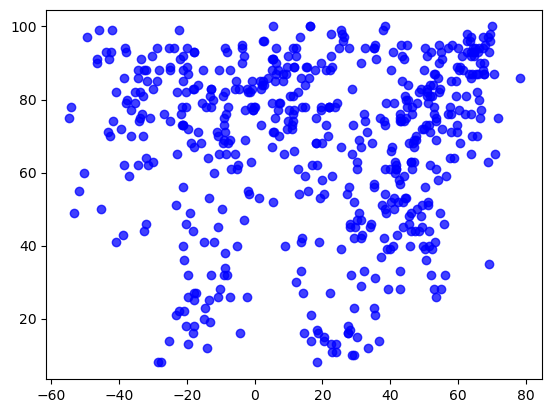

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="blue",
         alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

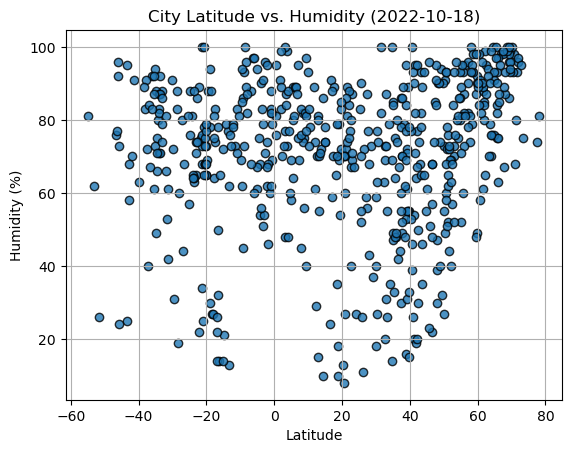

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

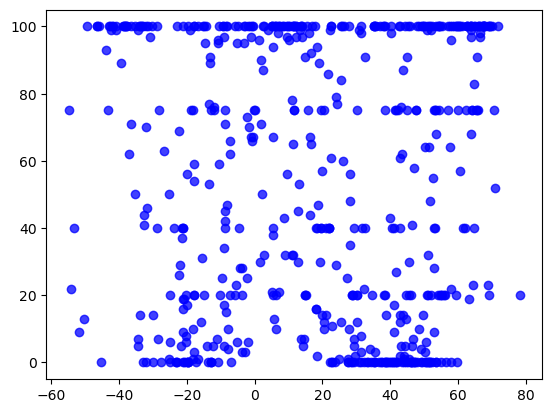

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="blue",
         alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

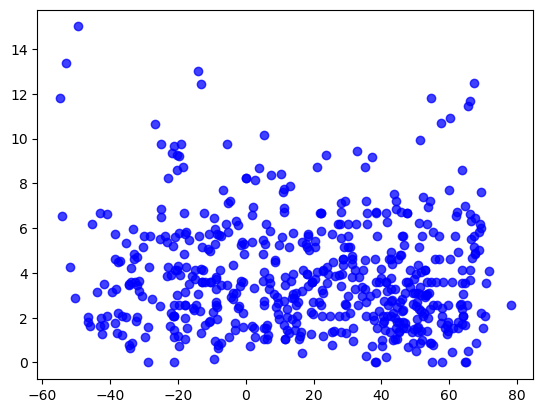

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="blue",
         alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig5.png")

# Show plot
plt.show()

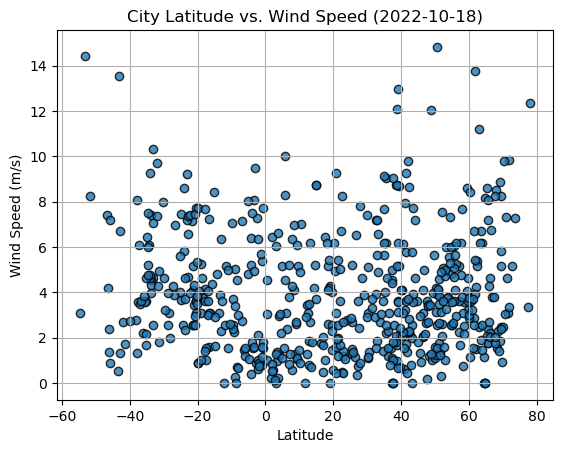

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


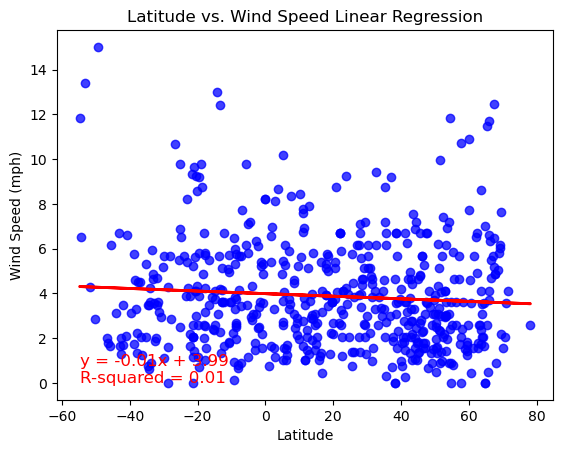

In [57]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Make sure city_data_df is correctly assigned as a DataFrame
# Example: city_data_df = pd.DataFrame(city_data)

# Scatter plot: Latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])

# Calculate the regression line values
regress_values = city_data_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(city_data_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(city_data_df['Lat']), min(city_data_df['Wind Speed'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,276.00,65,52,3.55,SJ,1695410370
2,kingston,17.9970,-76.7936,305.68,75,40,5.14,JM,1695410178
4,lompoc,34.6391,-120.4579,297.23,68,20,4.12,US,1695410083
5,marivan,35.5219,46.1760,295.08,21,0,2.70,IR,1695410372
6,college,64.8569,-147.8028,276.73,94,100,0.00,US,1695410372


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(city_data_df"Latitude")
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,301.22,76,100,5.74,TK,1695410209
3,port mathurin,-19.6833,63.4167,296.37,72,0,9.21,MU,1695410212
7,puerto natales,-51.7236,-72.4875,279.87,55,9,4.28,CL,1695410205
8,waitangi,-43.9535,-176.5597,286.38,93,93,3.13,NZ,1695410373
11,lebu,-37.6167,-73.6500,283.74,80,100,4.50,CL,1695410206


###  Temperature vs. Latitude Linear Regression Plot

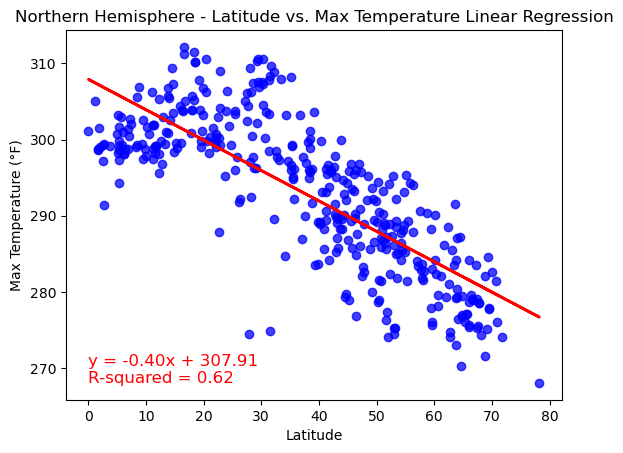

In [61]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Scatter plot: Latitude vs. Max Temperature for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Calculate the regression line values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Max Temp'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.7161472181434118


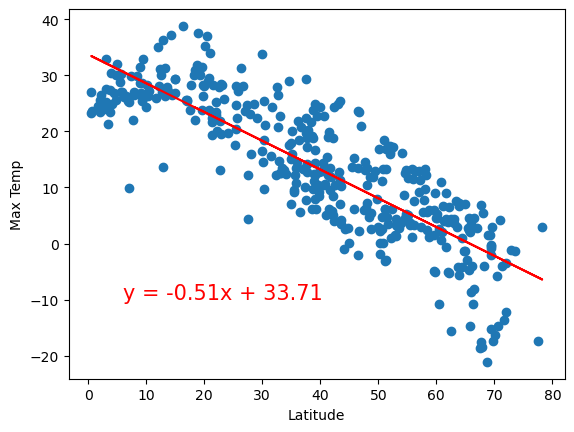

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

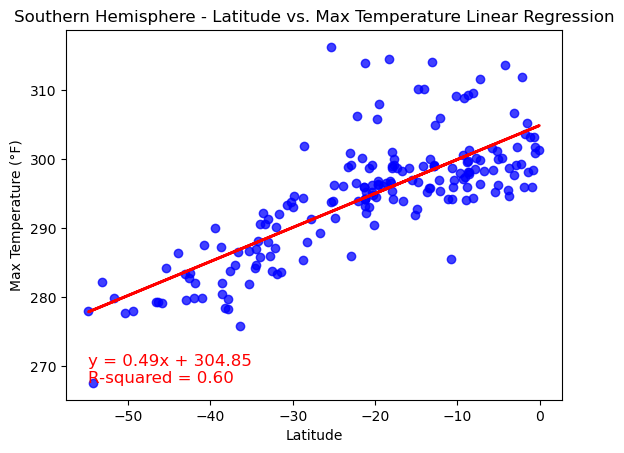

In [62]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Scatter plot: Latitude vs. Max Temperature for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Calculate the regression line values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Max Temp'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.4121057168607245


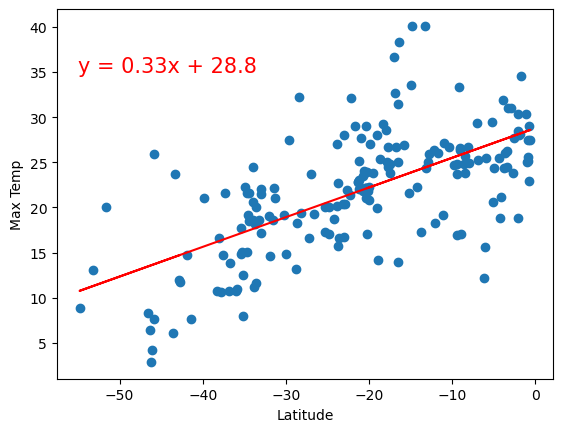

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

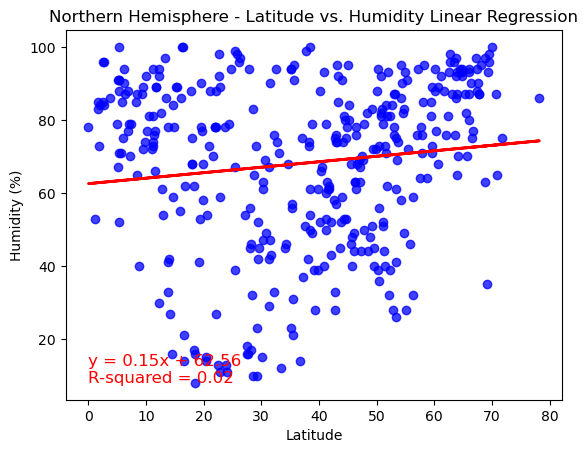

In [63]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Scatter plot: Latitude vs. Humidity for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Calculate the regression line values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs. Humidity Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Humidity'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.05689741545789598


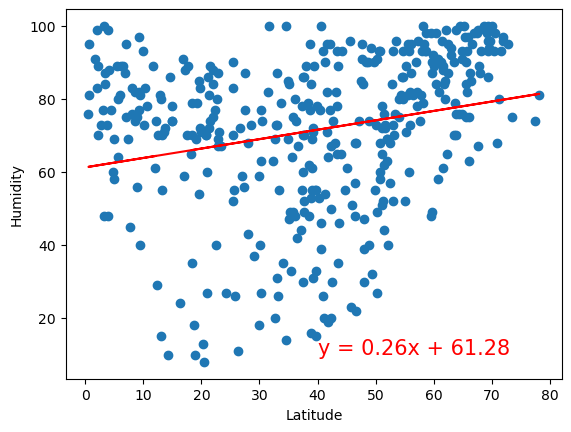

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

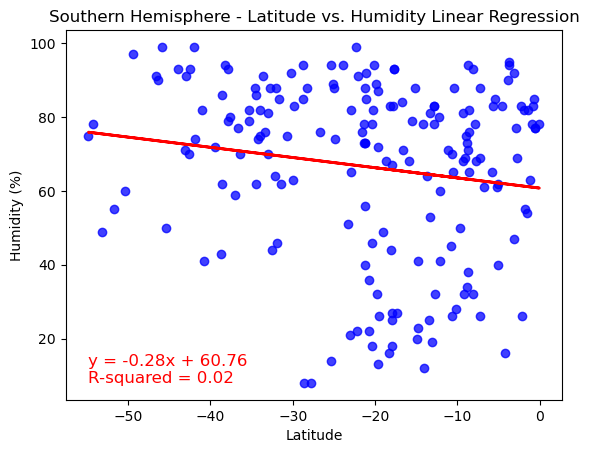

In [65]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Scatter plot: Latitude vs. Humidity for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Calculate the regression line values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs. Humidity Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Humidity'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.0002808747046324607


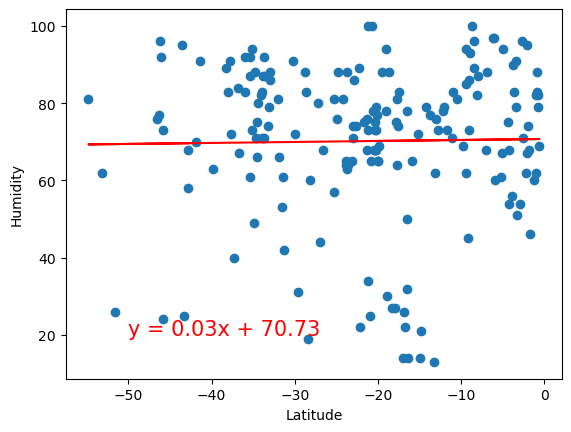

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

### Cloudiness vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** YOUR RESPONSE HERE

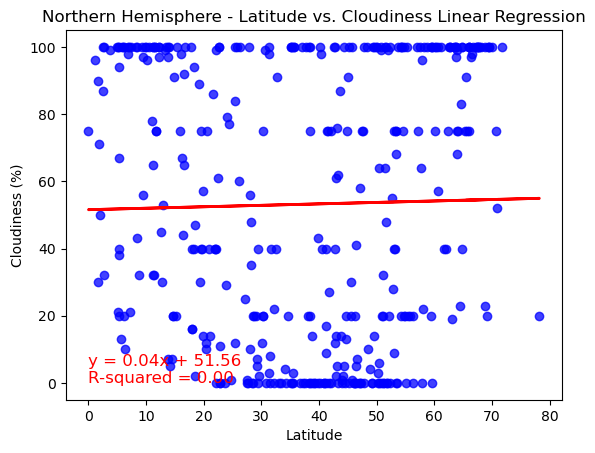

In [66]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Scatter plot: Latitude vs. Cloudiness for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Calculate the regression line values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Cloudiness'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.024026517125811015


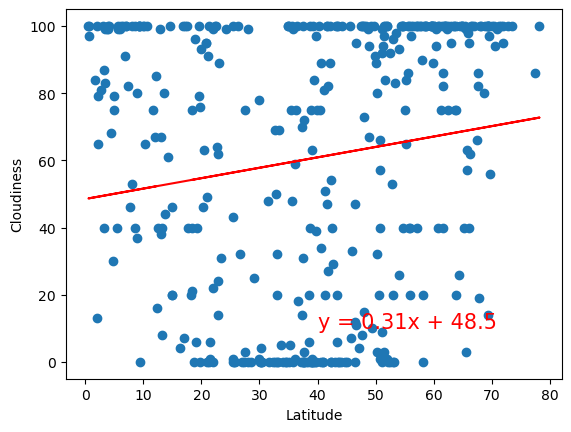

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

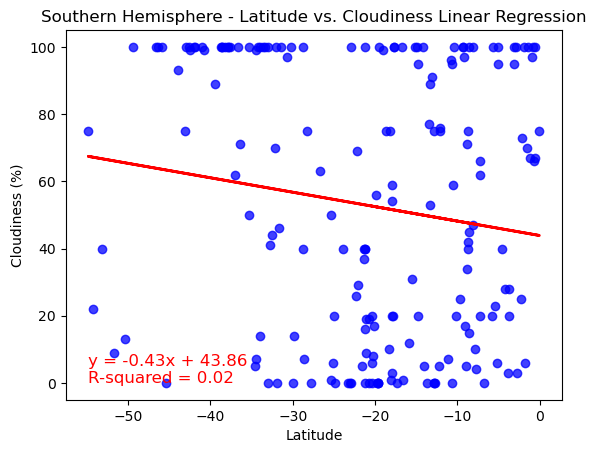

In [67]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Scatter plot: Latitude vs. Cloudiness for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Calculate the regression line values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Cloudiness'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.02056735429994368


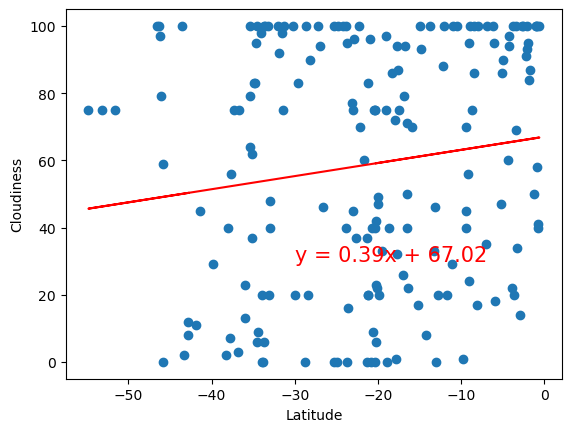

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

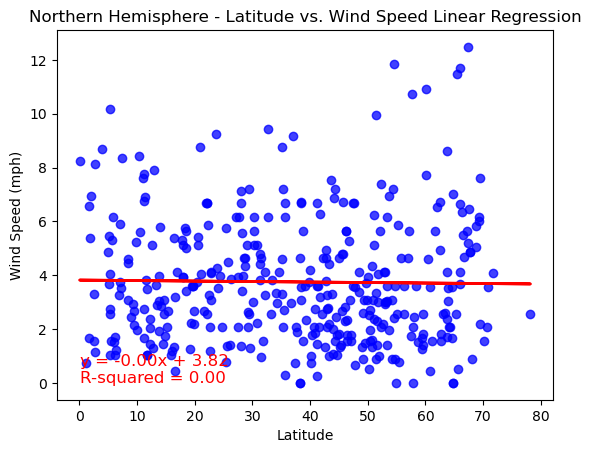

In [68]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Scatter plot: Latitude vs. Wind Speed for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Calculate the regression line values
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(northern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Wind Speed'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.030396762354449467


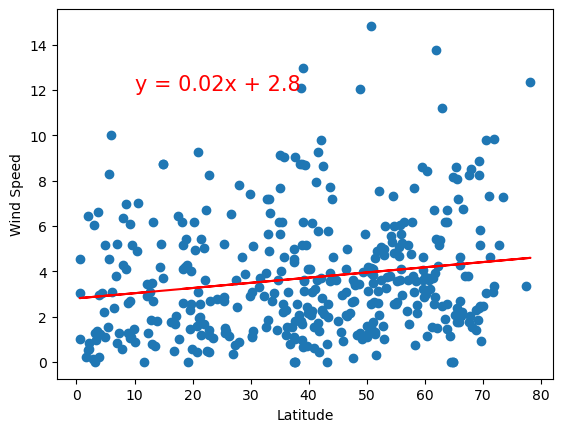

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

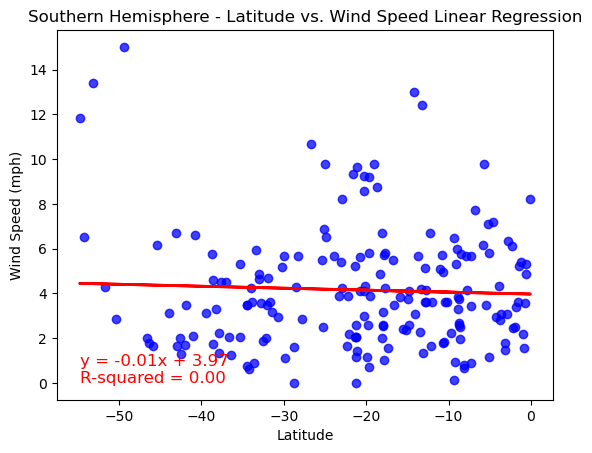

In [69]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Scatter plot: Latitude vs. Wind Speed for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="blue",
            alpha=0.75)

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Calculate the regression line values
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the regression line plot
plt.plot(southern_hemi_df['Lat'], regress_values, "r-", linewidth=2)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed Linear Regression")

# Annotate the plot with the linear equation and r-value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_value**2:.2f}"
plt.annotate(line_eq, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Wind Speed'])), fontsize=12, color="red")

# Save the figure
plt.savefig("Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: 0.062239040700515696


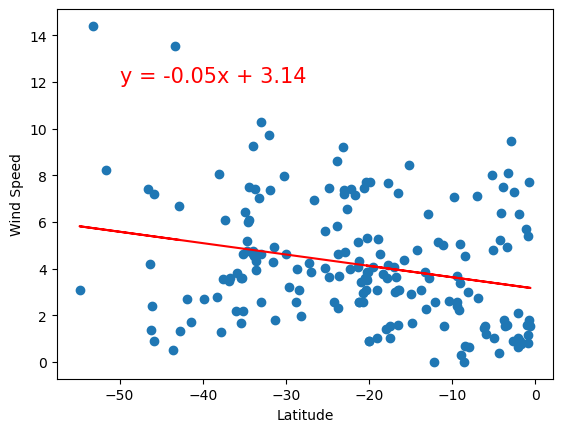

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE